In [1]:
# ME17B158 - Omkar Nath

# Real Data

Load the Housing_Price.csv and see the feature_discription.txt for more insight (However you don't need to remove any unneccesary feature just use encoding to convert the categorical features)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load data
df = pd.read_csv("Housing_Price.csv")

which are categorical and which are numerical features?

In [4]:
df.dtypes
# Those with object data type are categorical, while the rest are numerical

Id                int64
MSSubClass        int64
LotArea           int64
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
BsmtFinSF1        int64
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageCars        int64
GarageArea        int64
WoodDeckSF        int64
OpenPorchSF       int64
EnclosedPorch     int64
3SsnPorch         int64
ScreenPorch       int64
PoolArea          int64
MiscVal           int64
MoSold            int64
YrSold            int64
SalePrice         int64
Street           object
Condition1       object
Condition2       object
CentralAir       object
HeatingQC        object
LotShape         object
LandContour     

In [5]:
categorical_data = [label for label in df.columns if df.dtypes[label] == 'object']
numerical_data = [label for label in df.columns if label not in categorical_data]

In [6]:
print("Categorical Columns are:", categorical_data)
print("Numerical Columns are:", numerical_data)

Categorical Columns are: ['Street', 'Condition1', 'Condition2', 'CentralAir', 'HeatingQC', 'LotShape', 'LandContour']
Numerical Columns are: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Write a function for doing one hot encoding for all categorical features

Hint: Use pandas.get_dummies

In [7]:
def onehot_encoding(df,columns):
    '''
    Takes the dataframe 
    columns which are corresponding to categorical features
    '''
    return pd.get_dummies(df, columns=columns)

In [8]:
df_encoded = onehot_encoding(df, categorical_data)

Seperate the Label from the data, here it is 'SalePrice'

In [9]:
# Write your code here
X = df_encoded.drop(columns = ["SalePrice","Id"])
y = df_encoded["SalePrice"]

In [10]:
# Visualize the changed dataframe
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,HeatingQC_Po,HeatingQC_TA,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,0,1,0,0,0,1
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,0,1,0,0,0,1
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,1,0,0,0,0,0,0,1
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,1,0,0,0,0,0,0,1
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,1,0,0,0,0,0,0,1


Split train test split with random state 42, test size 0.2

You can use sklearn module for this exercise

In [11]:
# Split data here 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## Lasso Regression

1. search for alphas in range of 0.1 to 1000 for Lasso rigression, choose the best which minimizes the mse 
2. Plot the alphas vs MSE  

Hint:   
- cross validation score gives accuracy not the error convert to error appropriately (otherwise choose lambda which maximizes the score)


In the following cell, use training which was split earlier to cross validate (using cross_val_score) use cv = 5 (5 folds), then calculate the mean of the cross validation score for each alphas and plot $\lambda$ vs cross_valiadtion_score  or cross_validation_error. If you choose the accuracy then choose the $\lambda$ which maximizes the cross_val_score. 

For range of alphas use  alphas = np.logspace(-1, 3, 100)

Finally find the $\lambda$ which maximizes the score (or minimizes the error) (appropriate value of $\lambda$ is enough just by seeing the graph)

In [12]:
# write your code here and plot lambda vs cross validation score
alphas_lasso = np.logspace(-1, 3, 100)
lasso_alpha = 0
prev_score = -1
scores_lasso = []

for alpha in alphas_lasso:
    regressor = Lasso(alpha=alpha)
    current_score = np.mean(cross_val_score(regressor, X_train, y_train, cv=5))
    scores_lasso.append(current_score)
    
    if current_score > prev_score:
        lasso_alpha = alpha
        
    prev_score = current_score

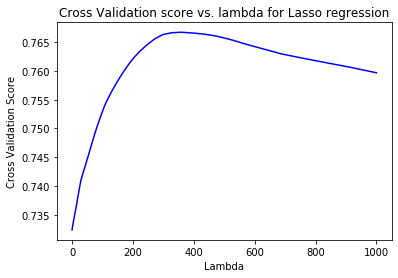

In [13]:
plt.plot(alphas_lasso, scores_lasso, color='blue')
plt.title("Cross Validation score vs. lambda for Lasso regression")
plt.xlabel("Lambda")
plt.ylabel("Cross Validation Score")
plt.show()

In [14]:
print("Best lambda for Lasso Regression =", lasso_alpha)

Best lambda for Lasso Regression = 359.3813663804629


In [15]:
lasso_regressor = Lasso(alpha=lasso_alpha)
lasso_regressor.fit(X_train, y_train)

Lasso(alpha=359.3813663804629, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

## Ridge Regression

1. search for alphas in range of 0.1 to 100 for Ridge rigression, choose the best which minimizes the mse 
2. Plot the alphas vs MSE


This similar to as explained for Lasso regression. Again plot $\lambda$ vs accuracy (or error) 

For range of alphas use  alphas = np.logspace(-1, 2, 100)

Finally find the $\lambda$ which maximizes the score (or minimizes the error) (appropriate value of $\lambda$ is enough just by seeing the graph)


In [16]:
# write your code here and plot lambda vs cross validation score
ridge_alphas = np.logspace(-1, 2, 100)
ridge_alpha = 0
prev_score = -1
ridge_scores = []

for alpha in ridge_alphas:
    regressor = Ridge(alpha=alpha)
    current_score = np.mean(cross_val_score(regressor, X_train, y_train, cv=5))
    ridge_scores.append(current_score)
    
    if current_score > prev_score:
        ridge_alpha = alpha
        
    prev_score = current_score

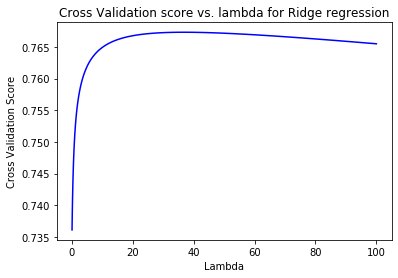

In [17]:
plt.plot(ridge_alphas, ridge_scores, color='blue')
plt.title("Cross Validation score vs. lambda for Ridge regression")
plt.xlabel("Lambda")
plt.ylabel("Cross Validation Score")
plt.show()

In [18]:
print("Best lambda for Ridge Regression =", ridge_alpha)

Best lambda for Ridge Regression = 37.64935806792467


In [19]:
ridge_regressor = Ridge(alpha=ridge_alpha)
ridge_regressor.fit(X_train, y_train)

Ridge(alpha=37.64935806792467, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Now compare regularized models to linear Regression model

In the following cell, calculate cross validation score using Linear Regression model

In [20]:
# write your code here print cross validation score
lin_reggressor = LinearRegression()
lin_score = np.mean(cross_val_score(lin_reggressor, X_train, y_train, cv=5))

lin_reggressor.fit(X_train, y_train)
y_train_pred = lin_reggressor.predict(X_train)
linear_mse = mean_squared_error(y_train, y_train_pred)

print("Cross Validation score for Simple Linear Regression =", lin_score)
print("Mean Square Error =",linear_mse)

Cross Validation score for Simple Linear Regression = 0.7319127091470573
Mean Square Error = 1046696125.710393


Now you have $\lambda$ values for both ridge and lasso regression, predict the model on the test data you created earlier

In the following cell use selected $\lambda$ as the model parameter, predict on test data, compare among three models and report your findings. 




Finally use lasso regression to find the important features and write your observations and also what do you observe when you compare both coefficients of Ridge and Lasso ? Do you see any property of Lasso which is used?
 
Hint: 
- Check weights corresponding to each features


Note:
- Don't worry if you have huge error in prediction, it is possible, just compare among models and report which has lease error.


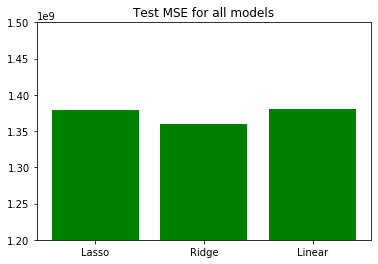

In [21]:
# predict on test data which you  splitted earlier, print coefficients of the learned model, Mean square error. Report the model which gives the least MSE. Also commenton important features
lasso_test_pred = lasso_regressor.predict(X_test)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)

ridge_test_pred = ridge_regressor.predict(X_test)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)

linear_test_pred = lin_reggressor.predict(X_test)
linear_test_mse = mean_squared_error(y_test, linear_test_pred)

plt.bar(x=["Lasso", "Ridge", "Linear"], height=[lasso_test_mse, ridge_test_mse, linear_test_mse], color='green')
plt.ylim([1.2e9, 1.5e9])
plt.title("Test MSE for all models")
plt.show()

In [22]:
print("Test MSE for Linear is ",linear_test_mse," Ridge is ",ridge_test_mse," and Lasso is ",lasso_test_mse)

Test MSE for Linear is  1380512172.4161482  Ridge is  1360214643.7518344  and Lasso is  1379208206.3329391


In [23]:
# Order of performance, based on increasing order of MSE is:
# Ridge > Lasso > Linear

In [24]:
# Coefficients
coefficients = {"Linear": lin_reggressor.coef_, "Ridge": ridge_regressor.coef_, "Lasso": lasso_regressor.coef_}
df_coefficients = pd.DataFrame(coefficients)
print(df_coefficients)
# It is seen that coefficients for Ridge and Lasso are lower

           Linear         Ridge         Lasso
0     -174.568153   -176.219642   -183.777177
1        0.462216      0.360275      0.395699
2    17594.616989  17540.037180  18500.951101
3     4491.264941   4233.372718   3432.178831
4      335.758423    328.783030    314.327053
5      138.787487    158.241795    173.956347
6       12.382085     11.249902     14.548230
7       -3.618867     -3.552983      0.000000
8       -1.353687     -1.039077      2.233262
9        7.409531      6.657842      1.700208
10      14.871679     13.598776     43.534317
11      11.655132     11.959053     41.946652
12       8.863129      8.272128     37.097535
13      35.389940     33.829957      5.611505
14    8704.702431   8326.367252   7877.489419
15   -3598.431914  -1654.508545     -0.000000
16    1755.390348   1885.151340      0.000000
17     252.320829    -32.848715     -0.000000
18   -8304.254354  -7349.848074  -6816.675271
19  -11119.994853  -4725.450018     -0.000000
20    5005.944750   4543.960677   

In [25]:
# Important features in Lasso Regularization
lasso_imp_features = [feature for i, feature in enumerate(X.columns) if lasso_regressor.coef_[i]!=0]
print(lasso_imp_features)
# non-important features have coeff 0

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Condition1_Norm', 'HeatingQC_Ex', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS']
